<a href="https://colab.research.google.com/github/KValim/Projetcs/blob/main/FIAP/statistics%20fundamentals/Fiap_Teste_de_hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

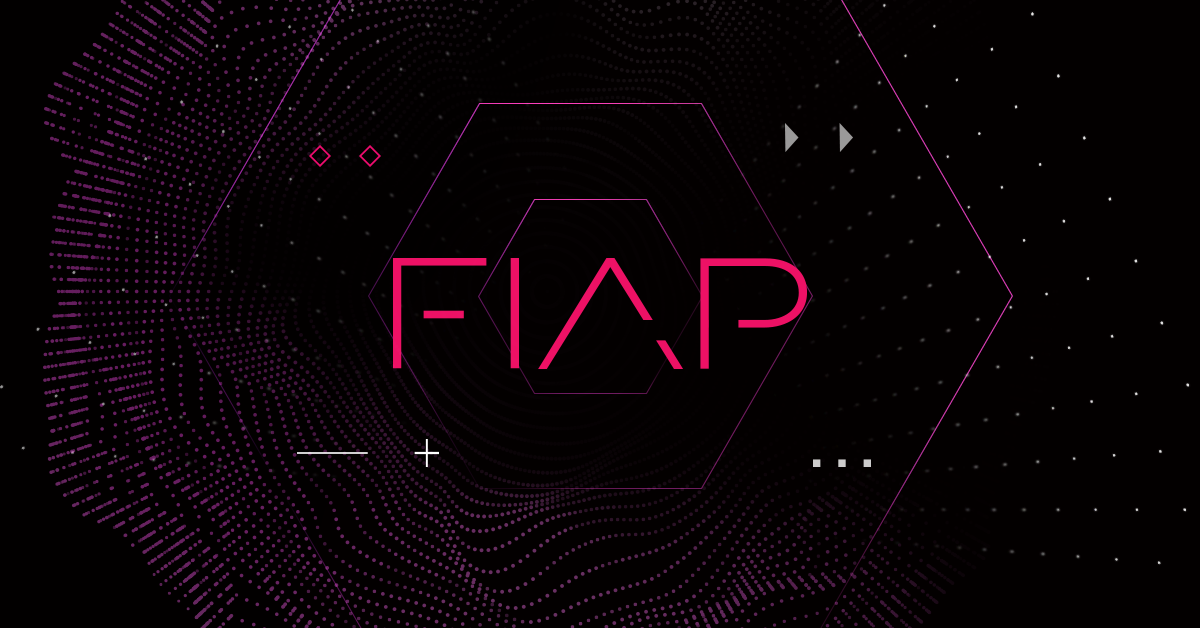

### Inicio - carregando uma base

Considere uma base com dados da popula√ß√£o

In [ ]:
from scipy.stats import normaltest
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

populacao = pd.read_csv('/content/drive/MyDrive/FIAP/benchmark.csv')
populacao.head()

Estudo  Renda  UF SEXO  COR  Idade    Altura
0      12    800  RO    M  PAR     23  1.603808
1      12   1150  RO    F  BRA     23  1.739790
2      15    880  RO    F  PAR     35  1.760444
3       6   3500  RO    M  BRA     46  1.783158
4       9    150  RO    F  PAR     47  1.690631

Criando uma amostra com 500 casos com altura superior a 1,50m

In [ ]:
amostra = populacao[populacao['Altura']>1.5].sample(500)
amostra.head()

Estudo  Renda  UF SEXO  COR  Idade    Altura
6733       16   3100  PA    M  PAR     54  1.775792
56812      12   1500  PR    M  BRA     50  1.625586
28818      12   1464  BA    F  PAR     50  1.748819
26395       1    500  BA    M  BRA     39  1.684150
20936       4  10000  PE    M  BRA     50  1.608651

In [ ]:
amostra = populacao[populacao['Idade']>=12].sample(500)
amostra.head()

Estudo  Renda  UF SEXO  COR  Idade    Altura
63503       9   2500  RS    M  BRA     44  1.712905
15238       4    788  CE    M  PAR     34  1.642297
31167      11    500  BA    F  PRE     41  1.575486
37126       8   1500  MG    M  BRA     47  1.735852
29715       7    380  BA    F  PAR     41  1.614756

##Teste de normalidade

A fun√ß√£o shapiro.test testa a hip√≥tese nula  ùêª0  de que a amostra √© proveniente de uma distribui√ß√£o normal, ou seja, os dados s√£o normalmente distribu√≠dos.
**Rejeitar  ùêª0 (ser normal) se o valor  ùëù‚â§ùõº**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


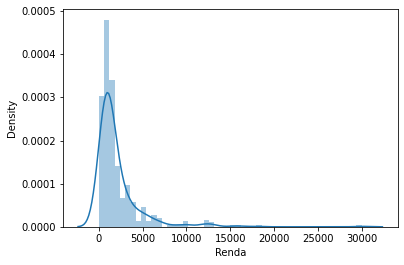

In [ ]:
import seaborn as sns
sns.distplot(amostra['Renda'])

Realizando o teste de hip√≥tese

In [ ]:
normaltest(amostra['Renda'])

NormaltestResult(statistic=480.9652710037981, pvalue=3.628427150392353e-105)

p valor menor que significancia 5%, entao rejeita H0, ser normal, logo nao eh normal[texto do link  

Considere outra vari√°vel, a altura 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


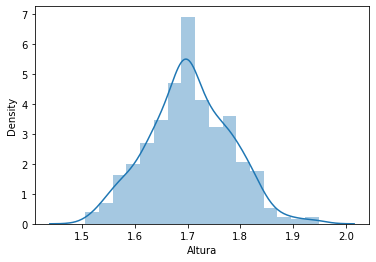

In [ ]:
import seaborn as sns
sns.distplot(amostra['Altura'])

Realizando novamente o teste de hip√≥tese


In [ ]:
normaltest(amostra['Altura'])

NormaltestResult(statistic=0.841232039339392, pvalue=0.6566421906926843)

normaltest(amostra['Altura'])

# Teste de Hipotese

##Teste Bicaudal

A empresa Suco Bom produz sucos de frutas em embalagens de 500 ml. Seu processo de produ√ß√£o √© quase todo automatizado e as embalagens de sucos s√£o preenchidas por uma m√°quina que √†s vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conte√∫do. Quando o volume m√©dio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os org√£os fiscalizadores. Quando o volume passa de 500 ml, a empresa come√ßa a se preocupar com preju√≠zos no processo de produ√ß√£o.

O setor de controle de qualidade da empresa Suco Bom extrai, periodicamente, amostras de 50 embalagens para monitorar o processo de produ√ß√£o. Para cada amostra, √© realizado um teste de hip√≥teses para avaliar se o maquin√°rio se desajustou. A equipe de controle de qualidade assume um n√≠vel de signific√¢ncia de 5%.

Suponha agora que uma amostra de 50 embalagens foi selecionada e que a m√©dia amostral observada foi de 503,24 ml e desvio padrao 4,48. Esse valor de m√©dia amostral √© suficientemente maior que 500 ml para nos fazer rejeitar a hip√≥tese de que a m√©dia do processo √© de 500 ml ao n√≠vel de signific√¢ncia de 5%? 



In [ ]:
from scipy.stats import norm
from numpy import sqrt
#Hipotese de ser igual, significa um bicaudal com h0 da medias serem iguais
#ùêª0:ùúá=500 
#ùêª1:ùúá‚â†500
u=500
n =50
sig=0.05
z_sig_sob2 = norm.ppf(sig/2)
print(z_sig_sob2)
x=503.24
s=4.48
z=(x-u)/(s/sqrt(n))
z

-1.9599639845400545


5.113897256795581

In [ ]:

area=norm.cdf(z)
print(area)
pvalor=2*(1-area)
print(pvalor)
if (pvalor <= sig):
    print('rejeita h0')
else:
    print('aceita h0')

#Rejeitar  ùêª0  se o valor  ùëù‚â§ùõº

0.9999998422104751
3.155790497810784e-07
rejeita h0


In [ ]:
from statsmodels.stats.weightstats import ztest
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]
ztest(x1 = amostra, value = u)


(5.109559775991873, 3.229103172445771e-07)

Conclus√£o: Como a m√©dia amostral  ùë•¬Ø  √© significativamente maior que 500 ml, rejeitamos  ùêª0 . Neste caso, devem ser tomadas provid√™ncias para ajustar o maquin√°rio que preenche as embalagens.



##Teste Unicaudal 

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto cont√©m, no m√°ximo, 37 gramas de a√ß√∫car. Esta alega√ß√£o nos leva a entender que a quantidade m√©dia de a√ß√∫car em uma lata de refrigerante deve ser igual ou menor que 37 g.
Um consumidor desconfiado e com conhecimentos em infer√™ncia estat√≠stica resolve testar a alega√ß√£o do fabricante e seleciona, aleat√≥riamente, em um conjunto de estabelecimentos distintos, uma amostra de 25 latas do refrigerante em quest√£o. Assumindo que essa popula√ß√£o se distribua aproximadamente como uma normal e considerando um n√≠vel de signific√¢ncia de 5%, √© poss√≠vel aceitar como v√°lida a alega√ß√£o do fabricante?



In [ ]:
from scipy.stats import t as t_student
from numpy import mean, std
#ùêª0:ùúá‚â§37 
#ùêª1:ùúá>37
amostra = [37.27, 36.42, 34.84, 34.60, 37.49, 
           36.53, 35.49, 36.90, 34.52, 37.30, 
           34.99, 36.55, 36.29, 36.06, 37.42, 
           34.47, 36.70, 35.86, 36.80, 36.92, 
           37.04, 36.39, 37.32, 36.64, 35.45]
n=25
u=37
x=mean(amostra) 
s=std(amostra)
sig<-0.05
conf = 1-sig
graus_de_lib = n-1
t_sig = t_student.ppf(conf, graus_de_lib)
print(t_sig)
t = (x - u) / (s / sqrt(n))
t

1.7108820799094275


-3.9568374713288734

In [ ]:
pvalor = 1-t_student.cdf(t, df = graus_de_lib)
pvalor
#Rejeitar  ùêª0  se o valor  ùëù‚â§ùõº

0.9997062063779475

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW
test = DescrStatsW(amostra)
test.ttest_mean(value = u, alternative = 'larger')

(-3.8768931199520447, 0.9996406170303819, 24.0)

Conclus√£o: Com um n√≠vel de confian√ßa de 95% n√£o podemos rejeitar  ùêª0 , ou seja, a alega√ß√£o do fabricante √© verdadeira.


##Teste duas amostras

Em nosso dataset temos os rendimento dos chefes de domic√≠lio obtidos da Pesquisa Nacional por Amostra de Domic√≠lios - PNAD no ano de 2015. Um problema bastante conhecido em nosso pa√≠s diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleat√≥rias, uma de 500 homens e outra com 500 mulheres, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade, teste a igualdade das m√©dias entre estas duas amostras com um n√≠vel de signific√¢ncia de 1%.

In [ ]:
homens = [300, 1000, 4000, 5000, 300, 350, 1200, 1200, 1100, 1800, 700, 5000, 250, 1560, 400, 5500, 3000, 0, 1100, 1500, 500, 500, 788, 500, 3000, 788, 2400, 788, 3300, 1350, 2500, 2000, 1300, 2430, 9000, 10120, 1380, 2000, 1400, 1000, 500, 1500, 2200, 2100, 4000, 1000, 1200, 2900, 1800, 2000, 788, 1576, 800, 2400, 788, 788, 788, 0, 12000, 7880, 850, 1000, 1000, 1600, 3800, 788, 1200, 300, 350, 700, 6000, 1500, 5000, 2000, 1200, 800, 250, 800, 1600, 400, 3000, 2304, 800, 1400, 450, 788, 2200, 6000, 1200, 4000, 6000, 1100, 1200, 1300, 3000, 3000, 1500, 1280, 788, 1400, 788, 4000, 0, 1000, 2500, 1300, 3000, 500, 1600, 2000, 1280, 150, 0, 0, 7000, 1061, 700, 788, 2000, 788, 10500, 788, 1600, 1050, 1100, 3000, 800, 1400, 1200, 2500, 1000, 1500, 1500, 900, 2000, 300, 3000, 788, 1400, 2000, 2000, 3000, 2600, 15000, 1500, 950, 1200, 1500, 7500, 1400, 350, 750, 1200, 788, 0, 2500, 1700, 788, 700, 1600, 1200, 320, 6000, 2000, 2000, 3000, 900, 2100, 0, 788, 1800, 1600, 4000, 1300, 1300, 1500, 8900, 1400, 788, 600, 1000, 950, 2000, 4000, 2300, 2000, 800, 2500, 1500, 1400, 800, 6000, 788, 900, 200, 1300, 788, 2600, 1500, 8000, 900, 2000, 2000, 350, 3000, 9580, 0, 400, 800, 1700, 1800, 1200, 18000, 9000, 3000, 1200, 700, 1200, 400, 987, 6000, 2000, 0, 0, 480, 500, 800, 1680, 10000, 1200, 1700, 788, 2200, 10000, 10000, 100, 1200, 1600, 2500, 1300, 1200, 1300, 2200, 200, 60, 1100, 1200, 6000, 4500, 100, 788, 2900, 2500, 900, 788, 2500, 4000, 788, 1400, 1000, 300, 788, 1000, 4000, 2200, 788, 1000, 1000, 600, 1600, 6000, 2500, 2500, 1000, 3000, 2200, 4500, 1500, 4300, 1500, 8500, 3200, 1200, 1200, 1500, 4000, 2000, 1350, 1500, 890, 5000, 2400, 13000, 800, 1500, 1500, 2000, 580, 500, 920, 1200, 2000, 788, 500, 20000, 1350, 1576, 500, 8000, 1800, 600, 1000, 3000, 4000, 1500, 788, 600, 2300, 1500, 500, 500, 800, 900, 8000, 1600, 3000, 788, 1500, 5200, 900, 3565, 650, 1700, 1600, 788, 1200, 788, 788, 100, 900, 1700, 10000, 1600, 200, 788, 1400, 1500, 400, 4200, 1400, 4000, 5516, 3500, 700, 1400, 1200, 0, 7000, 2000, 5000, 2000, 750, 3000, 2000, 1500, 200, 3000, 1700, 1500, 7000, 1500, 788, 2400, 2500, 1500, 2000, 1500, 2000, 1100, 800, 1800, 480, 3500, 700, 3400, 5000, 5000, 1300, 3000, 2000, 900, 2000, 1000, 1800, 0, 1500, 788, 3500, 875, 5000, 2000, 1300, 1600, 0, 750, 1200, 120, 1800, 1200, 788, 1000, 0, 1400, 2300, 7000, 4000, 5000, 788, 20000, 4000, 0, 1200, 1800, 500, 1000, 788, 1300, 5000, 50, 1700, 2000, 1600, 2000, 1350, 1500, 600, 1700, 780, 2446, 2100, 5000, 1700, 1200, 1000, 788, 4500, 1500, 788, 0, 1580, 1000, 4500, 2400, 788, 1100, 2000, 788, 100, 1200, 1200, 1200, 1000, 2000, 788, 2000, 15000, 600, 0, 1500, 3000, 4000, 900, 810, 600, 1500, 4000, 1200, 5000, 5300, 2500, 800, 0, 1400, 1500, 4000, 1200, 400, 1000, 820, 1000, 1000, 788, 1500, 2500, 1500, 220, 600, 788, 1750, 7000]
mulheres = [788, 1200, 6000, 1000, 788, 1100, 1900, 1577, 900, 950, 1200, 788, 788, 1100, 30, 620, 900, 1000, 1200, 2000, 0, 500, 1200, 1500, 1200, 1120, 788, 788, 2300, 2400, 3000, 788, 4000, 1000, 500, 500, 1700, 200, 6000, 400, 950, 1100, 50, 930, 850, 1100, 3500, 1500, 1200, 900, 1100, 1500, 788, 1000, 788, 4500, 4000, 8000, 3500, 788, 1050, 1000, 1400, 3500, 600, 3000, 500, 930, 2660, 788, 360, 2364, 788, 160, 1100, 1085, 1050, 1500, 100, 0, 788, 250, 1700, 1300, 800, 0, 2000, 820, 910, 300, 2000, 200, 788, 788, 800, 1500, 1300, 1200, 0, 600, 1036, 400, 1100, 788, 400, 1500, 1200, 1800, 1000, 788, 850, 60, 1800, 3500, 600, 200, 500, 200, 1100, 1540, 1100, 900, 800, 500, 200, 1200, 1250, 788, 500, 200, 788, 200, 0, 1800, 2000, 1000, 900, 3000, 700, 1200, 788, 2800, 3300, 400, 0, 850, 1022, 6000, 750, 1000, 3500, 400, 1500, 1000, 800, 0, 980, 2400, 850, 1100, 788, 1100, 788, 1200, 788, 864, 1000, 500, 400, 3000, 1200, 100, 80, 900, 2000, 1250, 1000, 300, 400, 1500, 60, 8000, 1000, 600, 800, 350, 788, 0, 600, 788, 2500, 1300, 800, 8000, 1100, 800, 900, 2000, 0, 800, 1400, 1000, 1200, 788, 3840, 788, 3940, 788, 560, 800, 2000, 600, 2900, 0, 400, 800, 7000, 788, 788, 788, 788, 1250, 1500, 1386, 100, 300, 788, 788, 600, 600, 900, 2800, 788, 350, 900, 0, 150, 788, 788, 1000, 30, 788, 780, 900, 0, 0, 3000, 1800, 2000, 1100, 788, 0, 7500, 1800, 788, 788, 2000, 3000, 180, 2500, 800, 0, 1250, 200, 1100, 0, 1100, 400, 1300, 300, 0, 1312, 600, 200, 4000, 2400, 12000, 2150, 500, 400, 0, 600, 400, 788, 1200, 500, 2000, 1500, 70, 500, 2000, 1000, 100, 500, 2000, 100, 2115, 800, 5800, 2300, 750, 788, 0, 900, 1000, 600, 3000, 5500, 1600, 788, 4000, 0, 1100, 120, 320, 1100, 2500, 200, 800, 3000, 550, 4200, 7000, 720, 0, 2000, 5000, 2000, 788, 500, 788, 7000, 500, 788, 1760, 1200, 3500, 1500, 150, 800, 788, 3000, 400, 788, 1000, 2000, 2500, 0, 788, 5200, 788, 0, 600, 1300, 120, 850, 1576, 788, 2000, 1300, 788, 800, 1800, 655, 1580, 789, 788, 850, 788, 7000, 788, 430, 800, 788, 900, 10000, 1200, 300, 400, 788, 788, 3000, 900, 1300, 1300, 788, 800, 1000, 1890, 0, 788, 900, 4000, 788, 1010, 150, 450, 1700, 890, 1200, 2800, 1000, 788, 788, 700, 600, 800, 880, 6000, 800, 800, 820, 788, 1030, 560, 2100, 6500, 2500, 788, 400, 300, 788, 2300, 1000, 3500, 984, 1576, 420, 1700, 450, 1800, 400, 1500, 1500, 4256, 1200, 890, 1200, 300, 400, 850, 1500, 3800, 1800, 996, 2000, 1000, 788, 1500, 300, 600, 950, 1200, 788, 1200, 1500, 250, 788, 1200, 6000, 300, 789, 1500, 788, 3800, 780, 1200, 1200, 220, 788, 500, 200, 480, 1576, 1576, 1035, 900, 800, 1000, 805, 200, 1200, 2220, 1500, 880, 220, 2000, 788, 150, 0, 13000, 40, 5500, 788, 788, 1000, 400, 2000, 200, 1600]

In [ ]:
from numpy import mean, std
xH = mean(homens)
sH = std(homens)
xM = mean(mulheres)
sM = std(mulheres)
print(xH)
print(sH)
print(xM)
print(sM)

2142.608
2545.5014763963504
1357.528
1568.330503821181


In [ ]:

#ùúá1‚áí  M√©dia das rendas dos chefes de domic√≠lios do sexo masculino
#ùúá2‚áí  M√©dia das rendas dos chefes de domic√≠lios do sexo feminino
#{ùêª0:ùúá1‚â§ùúá2
#ùêª1:ùúá1>ùúá2 
#ou
#{ùêª0:ùúá1‚àíùúá2‚â§0
#ùêª1:ùúá1‚àíùúá2>0 
sig = 0.01
conf = 1 - sig
z_sig = norm.ppf(conf)
print(z_sig)
nM = 500
nH = 500
D0 = 0
numerador = (xH - xM) - D0
denominador = sqrt((sH ** 2 / nH) + (sM ** 2 / nM))
z = numerador / denominador
z

2.3263478740408408


5.871494490942365

In [ ]:

p_valor = 1-norm.cdf(z)
p_valor
#Rejeitar  ùêª0  se o valor  ùëù‚â§ùõº

2.1594197541219273e-09

In [ ]:
from statsmodels.stats.weightstats import CompareMeans
comparador_medias = CompareMeans(DescrStatsW(homens), DescrStatsW(mulheres))
comparador_medias.ztest_ind(alternative='larger', value=0)

(5.865620057764754, 2.2372867859458255e-09)

Conclus√£o: Com um n√≠vel de confian√ßa de 99% rejeitamos  ùêª0 , isto √©, conclu√≠mos que a m√©dia das rendas dos chefes de domic√≠lios do sexo masculino √© maior que a m√©dia das rendas das chefes de domic√≠lios do sexo feminino. Confirmando a alega√ß√£o de desigualdade de renda entre os sexos.

### Teste de Hip√≥teses outra abordagem

In [ ]:
from scipy.stats import norm

In [ ]:
import numpy as np

###Teste T

O m√≥dulo stats atualmente oferece 32 fun√ß√µes para realizar diferentes testes de hip√≥tese, incluindo testes param√©tricos e n√£o-para√©tricos para m√©dia, mediana e vari√¢ncia e testes de bondade de ajuste e de normalidade. Come√ßaremos cobrindo o teste t de Student bicaudal para a m√©dia de uma cole√ß√£o de observa√ß√µes, i.e. ùêª0: ùë•¬Ø=ùúá0 e ùêª1: ùë•¬Ø‚â†ùúá0. Esse teste pode ser realizado pela fun√ß√£o ttest_1samp, que recebe como par√¢metros um array e uma m√©dia populacional:

In [ ]:
from scipy.stats import ttest_1samp

np.random.seed(42)

x = norm.rvs(loc=5, scale=10, size=1000)
print(
    '\n N√£o rejeita a hip√≥tese nula: {}'.format(ttest_1samp(x, 5))
)
print(
    '\n Rejeita a hip√≥tese nula: {}'.format(ttest_1samp(x, 0))
)


 N√£o rejeita a hip√≥tese nula: Ttest_1sampResult(statistic=0.6243089585093202, pvalue=0.5325672436623019)

 Rejeita a hip√≥tese nula: Ttest_1sampResult(statistic=16.77129726247285, pvalue=8.210083235562808e-56)


Os testes t para duas amostras podem ser realizados para amostras independentes ou pareadas por meio das fun√ß√µes ttest_ind e ttest_rel, respectivamente. A fun√ß√£o ttest_ind recebe dois arrays e realiza um teste bicaudal para igualdade das duas m√©dias. Exemplo:

In [ ]:
from scipy.stats import ttest_ind

np.random.seed(42)
a = norm.rvs(loc=5, scale=10, size=50)
b = norm.rvs(loc=5, scale=10, size=30)

print(
    '\n N√£o rejeita a hip√≥tese nula: {}'.format(ttest_ind(a, b))
)


 N√£o rejeita a hip√≥tese nula: Ttest_indResult(statistic=-1.2296429533938804, pvalue=0.22252704557384642)


A fun√ß√£o ttest_ind assume por padr√£o que as duas popula√ß√µes t√™m a mesma vari√¢ncia. Caso deseje-se assumir vari√¢ncias diferentes, pode-se atribuir o valor False ao par√¢metro equal_var:

In [ ]:
np.random.seed(42)
a = norm.rvs(loc=5, scale=10, size=50)
b = norm.rvs(loc=0, scale=1, size=30)

print(
    '\n Rejeita a hip√≥tese nula: {}'.format(ttest_ind(a, b, equal_var=False))
)


 Rejeita a hip√≥tese nula: Ttest_indResult(statistic=2.0257732965417956, pvalue=0.048054285617342485)


Caso apenas os valores das m√©dias, desvios e tamanhos amostrais estejam dispon√≠veis (ao inv√©s das amostras em si), pode-se usar a fun√ß√£o ttest_ind_from_stats:



In [ ]:
from scipy.stats import ttest_ind_from_stats

mean1, std1, nobs1 = 0, 1, 50
mean2, std2, nobs2 = -1, 1, 15

print(
    'Rejeita a hip√≥tese nula: {}'.format(
        ttest_ind_from_stats(
            mean1, std1, nobs1, mean2, std2, nobs2, equal_var=False
        )
    )
)

Rejeita a hip√≥tese nula: Ttest_indResult(statistic=3.396831102433787, pvalue=0.0024703403870314903)




Para realizar testes t bicaudais para a igualdade de m√©dias com amostras pareadas, o m√≥dulo stats disponibiliza a fun√ß√£o ttest_rel:

In [ ]:
from scipy.stats import ttest_rel
np.random.seed(42)
a = norm.rvs(loc=5, scale=10, size=50)
b = norm.rvs(loc=0, scale=1, size=50)  # mesmo tamanho

print(
    'Rejeita a hip√≥tese nula: {}'.format(ttest_rel(a, b))
)

Rejeita a hip√≥tese nula: Ttest_relResult(statistic=2.07798026408817, pvalue=0.042971567080910246)


#Testes Nao Parametricos

##Teste do Qui-Quadrado (  ùúí2 )

In [ ]:
from scipy.stats import chi
#ùêª0:ùêπùê∂ùê¥ùëÖùê¥=ùêπùê∂ùëÇùëÖùëÇùê¥ 
#ùêª1:ùêπùê∂ùê¥ùëÖùê¥‚â†ùêπùê∂ùëÇùëÖùëÇùê¥
Fobs =[17, 33]
Fesp =[25, 25]
sig  = 0.05
conf = 1 - sig 
k = 2 # N√∫mero de eventos poss√≠veis
graus_de_lib = k - 1
chi_2_sig = chi.ppf(conf, graus_de_lib) ** 2
print(chi_2_sig)
chi_2 = 0
for i in range(0,k,1):
    chi_2=chi_2+(Fobs[i]-Fesp[i])**2/Fesp[i] 

chi_2

3.8414588206941245


5.12

In [ ]:
from numpy import sqrt
1-chi.cdf(sqrt(chi_2), df=graus_de_lib)
#Rejeitar  ùêª0  se o valor  ùëù‚â§ùõº

0.023651616655355978

In [ ]:
from scipy.stats import chisquare
chisquare(f_obs=Fobs, f_exp=Fesp)

Power_divergenceResult(statistic=5.12, pvalue=0.023651616655356)

Conclus√£o: Com um n√≠vel de confian√ßa de 95% rejeitamos a hip√≥tese nula ( ùêª0 ) e conclu√≠mos que as frequ√™ncias observadas e esperadas s√£o discrepantes, ou seja, a moeda n√£o √© honesta e precisa ser substitu√≠da.

#Teste Pareado (Teste Wilcoxon)

O teste dos postos sinalizados de Wilcoxon √© comumente tratado como uma vers√£o n√£o-param√©trica do teste t para amostras pareadas. Ele testa se a distribui√ß√£o das diferen√ßas entre as duas amostras √© sim√©trica e centrada em zero.

In [ ]:
import pandas as pd
fumo = {
    'Antes': [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49],
    'Depois': [16, 8, 12, 0, 14, 16, 13, 12, 19, 17, 17, 2, 15, 10, 20, 13, 0, 4, 16, 18, 16, 16, 9, 9, 18, 4, 17, 0, 11, 14, 0, 19, 2, 9, 6]
}
fumo = pd.DataFrame(fumo)
fumo.head()

Antes  Depois
0     39      16
1     25       8
2     24      12
3     50       0
4     13      14

In [ ]:
from scipy.stats import wilcoxon
significancia = 0.05
confianca = 1 - significancia
n = 35
wilcoxon(fumo['Antes'], fumo['Depois'])

WilcoxonResult(statistic=22.0, pvalue=1.584310018505865e-06)

Conclus√£o: Rejeitamos a hip√≥tese de que n√£o existe diferen√ßa entre os grupos, isto √©, existe uma diferen√ßa entre as m√©dias de cigarros fumados pelos pacientes antes e depois do tratamento. E como √© poss√≠vel verificar atrav√©s das m√©dias de cigarros fumados por dia antes (31.86) e depois (11.2) do tratamento, podemos concluir que o tratamento apresentou resultado satisfat√≥rio.

###**WILCOXON** outra abordagem

No m√≥dulo stats, esse teste √© realizado pela fun√ß√£o wilcoxon e inclui um par√¢metro para escolha da cauda do teste, com padr√£o bicaudal (two-sided):


In [ ]:
from scipy.stats import wilcoxon
np.random.seed(42)
a = norm.rvs(loc=5, scale=10, size=50)
b = norm.rvs(loc=6, scale=1, size=50)

print(
    'Rejeita a hip√≥tese nula: {}'.format(wilcoxon(a, b))
)

print(
    'Rejeita a hip√≥tese nula: {}'.format(
        wilcoxon(a, b, alternative='two-sided')  # mesmo resultado
    )
)

print(
    '\nN√£o rejeita a hip√≥tese nula: {}'.format(
        wilcoxon(a, b, alternative='greater')
    )
)

print(
    'Rejeita a hip√≥tese nula: {}'.format(
        wilcoxon(a, b, alternative='less')
    )
)

Rejeita a hip√≥tese nula: WilcoxonResult(statistic=388.0, pvalue=0.016018532187551015)
Rejeita a hip√≥tese nula: WilcoxonResult(statistic=388.0, pvalue=0.016018532187551015)

N√£o rejeita a hip√≥tese nula: WilcoxonResult(statistic=388.0, pvalue=0.9919907339062245)
Rejeita a hip√≥tese nula: WilcoxonResult(statistic=388.0, pvalue=0.008009266093775507)


###KS - KOLMOGOROV-SMIRNOV

Para realizar o teste de Kolmogorov-Smirnov (KS) de bondade de ajuste √© simples, basta informar uma amostra e o nome de uma distribui√ß√£o dispon√≠vel no m√≥dulo stats √† fun√ß√£o kstest:





In [ ]:
from scipy.stats import kstest
np.random.seed(42)

a = norm.rvs(size=50)

print(
    '\n N√£o rejeita a hip√≥tese nula: {}'.format(
        kstest(a, 'norm')
    )
)

a = norm.rvs(loc=5, scale=10, size=50)

print(
    '\n Rejeita a hip√≥tese nula: {}'.format(
        kstest(a, 'norm')
    )
)


 N√£o rejeita a hip√≥tese nula: KstestResult(statistic=0.13357070563896067, pvalue=0.30642239333750654)

 Rejeita a hip√≥tese nula: KstestResult(statistic=0.6375899529148361, pvalue=2.827049477141131e-20)


Note que nos exemplos acima, a hip√≥tese nula foi rejeitada quando os dados n√£o foram sorteados de uma normal padr√£o. Isso porque, como vimos acima, no SciPy, norm √© a distribui√ß√£o padr√£o. No entanto, ao inv√©s de passar o nome da distribui√ß√£o como par√¢metro, podemos passar a fun√ß√£o cdf de uma distribui√ß√£o normal qualquer. Exemplo

In [ ]:
a = norm.rvs(loc=5, scale=10, size=50)

normal = norm(loc=5, scale=10)
print(
    'N√£o rejeita a hip√≥tese nula: {}'.format(
        kstest(a, normal.cdf)
    )
)

N√£o rejeita a hip√≥tese nula: KstestResult(statistic=0.08326080724304702, pvalue=0.8503553566561405)


Para testar a hip√≥tese de que duas amostras foram extra√≠das da mesma distribui√ß√£o cont√≠nua, podemos usar o teste KS para duas amostras:

In [ ]:
from scipy.stats import ks_2samp

a = norm.rvs(loc=5, scale=10, size=50)
b = norm.rvs(loc=5, scale=10, size=50)

print(
    '\n N√£o rejeita a hip√≥tese nula: {}'.format(
        ks_2samp(a, b)
    )
)

b = norm.rvs(size=50)

print(
    '\n Rejeita a hip√≥tese nula: {}'.format(
        ks_2samp(a, b)
    )
)


 N√£o rejeita a hip√≥tese nula: KstestResult(statistic=0.18, pvalue=0.3959398631708505)

 Rejeita a hip√≥tese nula: KstestResult(statistic=0.68, pvalue=2.6679407140599687e-11)
